In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
x = df.iloc[:, 3:13]

In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [15]:
y = df.iloc[:,[13]]

In [16]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [17]:
geography = pd.get_dummies(df["Geography"],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [18]:
gender = pd.get_dummies(df["Gender"],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [19]:
x = pd.concat([x,geography,gender],axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [20]:
x = x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train.shape

(8000, 11)

In [24]:
x_test.shape

(2000, 11)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [26]:
classifier = Sequential()

In [27]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation = 'relu',input_dim = 11))

In [28]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation = 'relu'))

In [29]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))

In [30]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33, batch_size = 10, nb_epoch=100)


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 12s 2ms/sample - loss: 0.5309 - accuracy: 0.7641 - val_loss: 0.4806 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 3s 488us/sample - loss: 0.4598 - accuracy: 0.7962 - val_loss: 0.4534 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 2s 459us/sample - loss: 0.4418 - accuracy: 0.7975 - val_loss: 0.4417 - val_accuracy: 0.7974
Epoch 4/100
5359/5359 [==============================] - 2s 421us/sample - loss: 0.4295 - accuracy: 0.8063 - val_loss: 0.4308 - val_accuracy: 0.8065
Epoch 5/100
5359/5359 [==============================] - 2s 428us/sample - loss: 0.4193 - accuracy: 0.8153 - val_loss: 0.4231 - val_accuracy: 0.8183
Epoch 6/100
5359/5359 [==============================] - 3s 494us/sample - loss: 0.4098 - accuracy: 0.8274 - val_loss: 0.4129 - val_accuracy: 0.8292
Epoch 7/100
5359/5359 [==============================] - 2s

Epoch 55/100
5359/5359 [==============================] - 2s 370us/sample - loss: 0.3302 - accuracy: 0.8606 - val_loss: 0.3603 - val_accuracy: 0.8516
Epoch 56/100
5359/5359 [==============================] - 2s 372us/sample - loss: 0.3300 - accuracy: 0.8602 - val_loss: 0.3579 - val_accuracy: 0.8538
Epoch 57/100
5359/5359 [==============================] - 2s 374us/sample - loss: 0.3300 - accuracy: 0.8619 - val_loss: 0.3584 - val_accuracy: 0.8519
Epoch 58/100
5359/5359 [==============================] - 3s 492us/sample - loss: 0.3303 - accuracy: 0.8614 - val_loss: 0.3584 - val_accuracy: 0.8519
Epoch 59/100
5359/5359 [==============================] - 3s 528us/sample - loss: 0.3288 - accuracy: 0.8617 - val_loss: 0.3594 - val_accuracy: 0.8550
Epoch 60/100
5359/5359 [==============================] - 3s 525us/sample - loss: 0.3295 - accuracy: 0.8615 - val_loss: 0.3597 - val_accuracy: 0.8508
Epoch 61/100
5359/5359 [==============================] - 2s 435us/sample - loss: 0.3296 - accuracy:

In [38]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


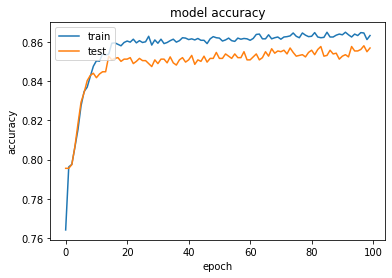

In [40]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


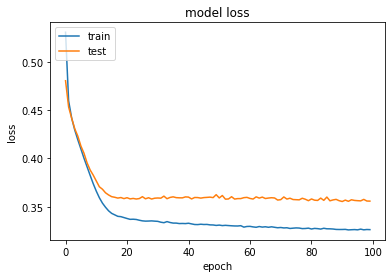

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [59]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8555